# 基于条形图的世界杯数据可视化
## 1 前言
要说时下最热门的活动，非2022卡塔尔世界杯莫属了。正好借此次完成课程论文的机会，回顾一下过往的世界杯，就其历史数据做一些数据的呈现和分析工作。根据对世界杯历史数据的简单观察，发现学习过的10种图片中的条形图能更直观地展示数据。同时，本次论文的选题和数据是来自于“阿里云天池平台”的可视化大赛“世界杯数据可视化分析”，该论文也将作为参赛作品同步到“天池平台”上。
## 2 导入模块和数据
第一步是导入所需要的包。为此，我们需要：
- pandas和它的DataFrame类来做数据读取和处理；
- numpy在图表中进行一些基于数据的科学运算；
- plotnine来获取数据并执行可视化操作。

除此之外，还使用了 plotnine 的 figure_size 函数来调整图形的大小，使它们显示得更加美观、整洁。

In [1]:
import numpy as np
import pandas as pd
import plotnine
plotnine.options.figure_size=(12, 4.2)
from plotnine import *
from plotnine import data

然后导入世界杯历史比赛的信息，文件为“WorldCupMatches.csv”。

In [2]:
# 导入数据并查看
# 注意要加encoding='gbk'，直接读取会显示
# UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 18508-18509: invalid continuation byte
# 这是由于数据中有一些非英语国家的语言，utf-8无法处理的编码导致的
matches = pd.read_csv('WorldCupMatches.csv',encoding='gbk')
matches

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,63267.0,0,0,C眉neyt 脟AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED


再查看一下数据描述，用以选取合适的数据x轴和y轴来进行可视化

In [3]:
matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


## 3 具体可视化数据的选取
通过观察表中的数据以及结合比赛实际情况，我发现了评价一届足球比赛的两项重要指标。一个就是当届世界杯的观众人数，这反映了这届比赛的受欢迎程度；另一个则是当届世界杯总的进球数，这反映了这届比赛的激烈程度。这两项指标分别从主观层面和客观层面反映了某届世界杯的精彩程度，是较为全面和有意义的数据分析。

同时，由于数据过多，无法对全部的比赛进行展示，故此次作业仅展示两项指标加权后排名靠前的几届世界杯。

## 4 数据预处理以便可视化
数据预处理的主要涉及到数据清洗，以及针对要分析的内容进行特定字段的转化。具体到该表，主要需要对每届世界杯的数据进行整合，求出当年的观众总数和进球总数，并计算出两项指标的得分，选取前面的比赛进行条形图的绘制。

In [4]:
# 先将空值补为0
matches.fillna(0)
# 使用聚集函数groupby求相同的‘Year’下的‘Attendance’的和
# 并设置as_index=False使‘Year’放弃列索引，让‘Year’和‘Attendance’处于同一列
att_matches=matches.groupby(['Year'],as_index=False)['Attendance'].sum()
# 使用apply函数将每场比赛两队的得分加起来，设置axis=1保证是列操作
matches['Goals']=matches.apply(lambda x: x['Home Team Goals'] + x['Away Team Goals'], axis=1)
score_matches=matches.groupby(['Year'],as_index=False)['Goals'].sum()

考虑到ggplot直方图绘制对数据格式有所要求，故需先按对应格式将数据进行转化。简单来说，就是将att_matches和score_matches拼在一起，然后加一列‘Index’表明具体是什么指标，用于fill参数。

In [5]:
# 创建新DataFrame
dic = {"Year": [],
       "y": [],
       "Index": []}
data = pd.DataFrame(dic)
# 做行遍历，将数据填到新的DataFrame中，并用int转换保证年份是整数
for index, row in att_matches.iterrows():
    data.loc[len(data.index)] = [int(row['Year']),
                                 row['Attendance'], 'Attendance']
for index, row in score_matches.iterrows():
    data.loc[len(data.index)] = [int(row['Year']), row['Goals'], 'Goals']
# 查看新数据
data

,Year,y,Index
0,1930,590549.0,Attendance
1,1934,363000.0,Attendance
2,1938,375700.0,Attendance
3,1950,1045246.0,Attendance
4,1954,768607.0,Attendance
5,1958,819810.0,Attendance
6,1962,893172.0,Attendance
7,1966,1563135.0,Attendance
8,1970,1603975.0,Attendance
9,1974,1865753.0,Attendance


我发现数据较多，全部绘制出来可能会不太美观与整洁，故选取其中较为“精彩”的几届比赛。至于评分权重，不妨两个指标五五开。具体的评分是以该届的指标除以该项指标的最大值，求和后取总分大于1的那几届比赛。

In [6]:
# 求指标最值
att_max = att_matches.loc[:, 'Attendance'].max()
score_max = score_matches.loc[:, 'Goals'].max()
# 分类求得分
data['Grade'] = data.apply(lambda x: x['y']/att_max if x['Index']
                           == 'Attendance' else x['y']/score_max, axis=1)

data

,Year,y,Index,Grade
0,1930,590549.0,Attendance,0.136725
1,1934,363000.0,Attendance,0.084043
2,1938,375700.0,Attendance,0.086983
3,1950,1045246.0,Attendance,0.241997
4,1954,768607.0,Attendance,0.177949
5,1958,819810.0,Attendance,0.189804
6,1962,893172.0,Attendance,0.206789
7,1966,1563135.0,Attendance,0.361900
8,1970,1603975.0,Attendance,0.371356
9,1974,1865753.0,Attendance,0.431963


In [7]:
df = pd.DataFrame({"Year": [], "y": [], "Index": [], "Grade": []})
# 循环查找各届比赛并计算对应的分数，选出大于等于1的放到df中
i = 1930
while i <= 2014:
    ans = data.query('Year=='+str(i))
    if (len(ans) > 1):
        if (ans.loc[:, 'Grade'].sum() >= 1):
            insertRow = ans[0: 2]
            # 采用concat进行添加，append会有后续不支持的提示
            df = pd.concat([df, ans])
    i += 4
#  对‘Year’和‘y’进行取整操作，以便图中显示
df['Year'] = data['Year'].astype(int)
df['y'] = data['y'].astype(int)
df

,Year,y,Index,Grade
11,1982,2109723,Attendance,0.488447
31,1982,146,Goals,0.708738
12,1986,2394031,Attendance,0.554271
32,1986,132,Goals,0.640777
13,1990,2516215,Attendance,0.582559
33,1990,115,Goals,0.558252
14,1994,3587538,Attendance,0.830594
34,1994,141,Goals,0.684466
15,1998,2785100,Attendance,0.644812
35,1998,171,Goals,0.830097


## 5 基本视图绘制
根据ggplot的要求，需要有x轴、y轴和分组变量放到aes审美映射中。
并且，为实现直方图的功能，还需要添加geoms的具体原语。如下图所示，为实现直方图的绘制，我使用的是使用geom_col()原语。

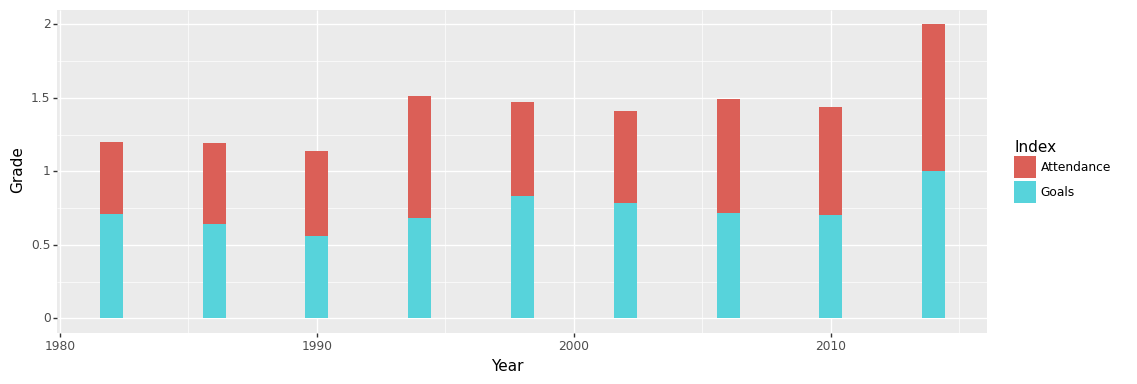

<ggplot: (156870788628)>

In [8]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col()
)
p

相比于堆叠的直方图，此处我们采用双直方图的效果可能会更好，故需要在geom_col()中加入position="dodge"的代码。

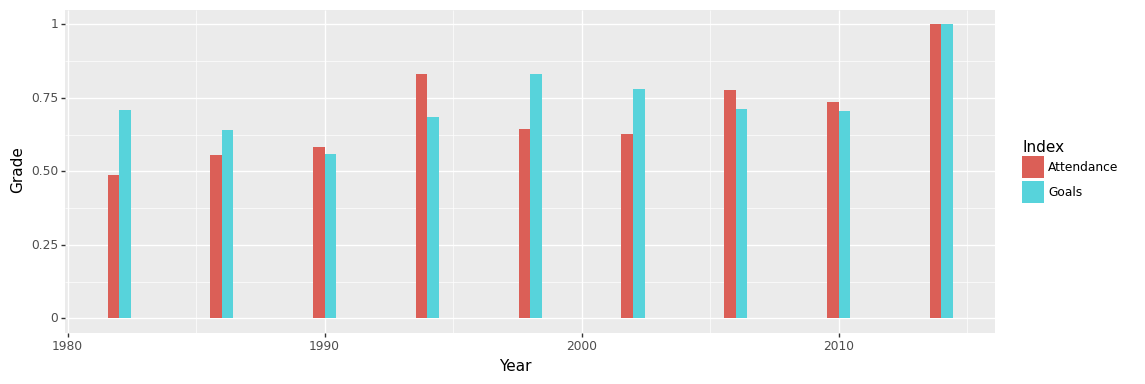

<ggplot: (156873574352)>

In [9]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge")
)
p

## 6 添加数据标签
完成了基本底图的绘制，接下来需要在图上加一些数据，让图中信息变得更丰富。首先，在各条形图上贴上数值标签，具体值取‘y’即可，分别表示观众总数和进球总数。以上可通过geom-geom_text()--并在其aes()参数中添加 label="y"来实现。为方便数据的显示，我们可对直方图的宽度进行调整，通过设置width属性来实现。

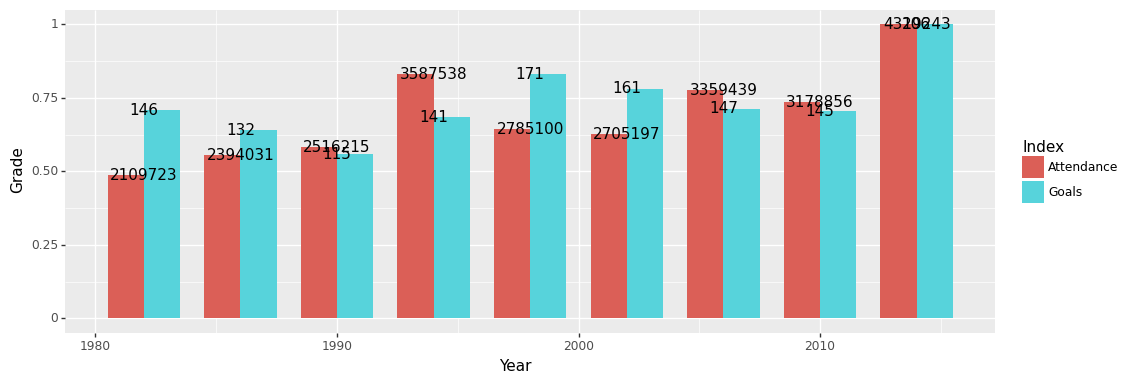

<ggplot: (156875705741)>

In [10]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(label="y"))
)
p

尽管数据标签已经添加上去了，但还不够美观，这主要体现在标签的大小、位置和内容上。首先标签的位置应该居于各条形图的中间（宽度和高度两方面）；然后是‘Attendance’的数值过大，不太好显示，可约算为多少W的形式；最后调整完以上内容，可适当对文字的大小做一些改动。

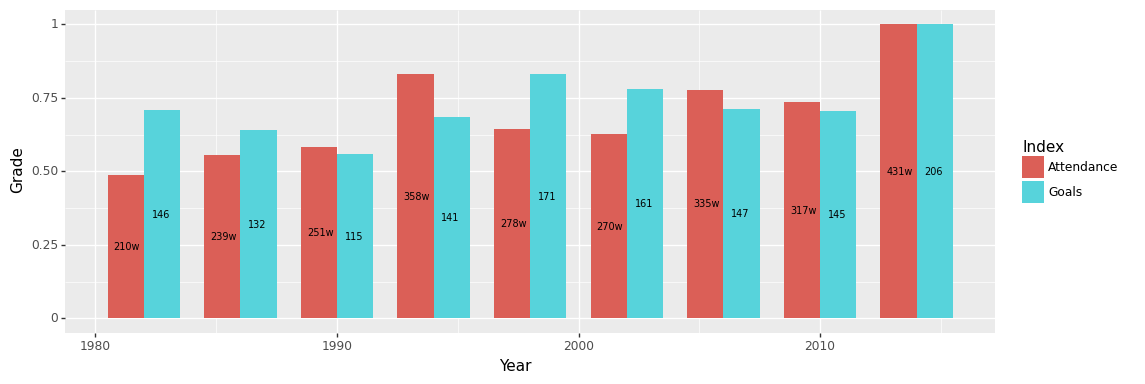

<ggplot: (156875769532)>

In [11]:
# y的坐标比较好确定，取‘Grade’的一半即可
df["y_pos"] = df["Grade"]/2
# x的坐标则要麻烦一点，需要根据它的Index而定，是‘Attendance’则在‘Year’基础上前移，‘Goals’则后移
df['x_pos'] = df.apply(lambda x: x['Year']-0.7 if x['Index']
                       == 'Attendance' else x['Year']+0.7, axis=1)
# 用类似的方式再加一列，转换标签为‘Attendance’的数据，不过此处转换并没有进行四舍五入，直接通过‘//’的除法来实现
df['y_show'] = df.apply(lambda x: str(x['y']//10000)+'w' if x['Index']
                        == 'Attendance' else x['y'], axis=1)
# 然后添加geom_text()原语通过aes()映射将求得的坐标赋上去
# 文字大小的调整则可设置size属性，此处设置为7
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
)
p

## 7 调整轴的刻度
观察已画出的图，我发现‘Year’没有显示出具体的年份，就无法知道具体是那届世界杯，故需要改变X轴的刻度线，可使用scale_x_continuous选项。这里将X轴改为每四年，因为世界杯是每四年一届。正好筛选出来的年份是1982年到2014年所有的世界杯，没有中间某届不在范围内的情况出现，故不需要再对x轴做进一步处理。可使用的参数如下：break选项来设置断点，它需要一个数值的列表作为参数。 可以使用numpy的range函数来生成这样一个列表，可设置开始、结束和步长。注意，由于 Python 的索引，在使用 np.range 的范围是[,)。同样地，如果想改变Y轴，可以使用scale_y_continuous选项。

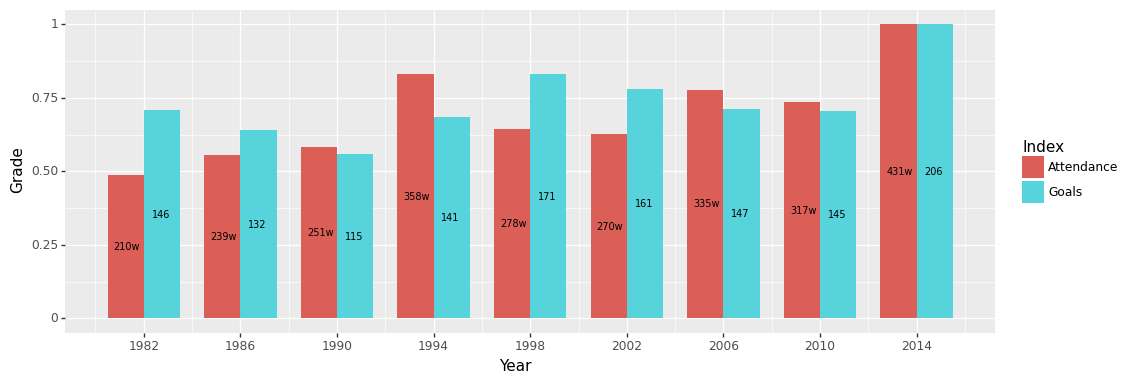

<ggplot: (156875797514)>

In [12]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
)
p

## 8 设置轴标签和标题
为了改变轴的标签，可以使用xlab和ylab方法添加所需的名称，分别对应的是x轴和y轴。添加标题，则要设置ggtitle选项，并将要设置的内容作为一个字符串参数传入。

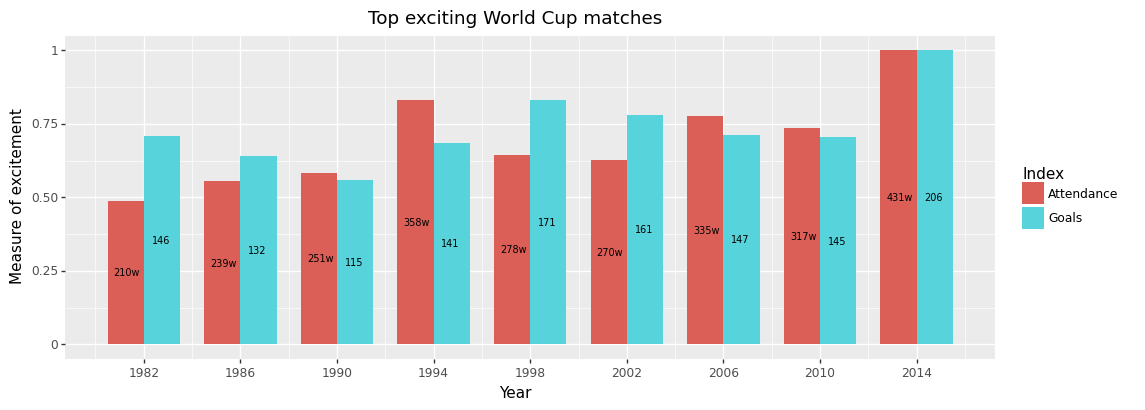

<ggplot: (156875691678)>

In [13]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
)
p

## 9 调整调色板
plotnine支持matplotlib中的调色板，通过scale_fill_manual选项可以设置，里面需要的参数是关于颜色的列表。先尝试把条形区域设为青绿色和橘黄色。

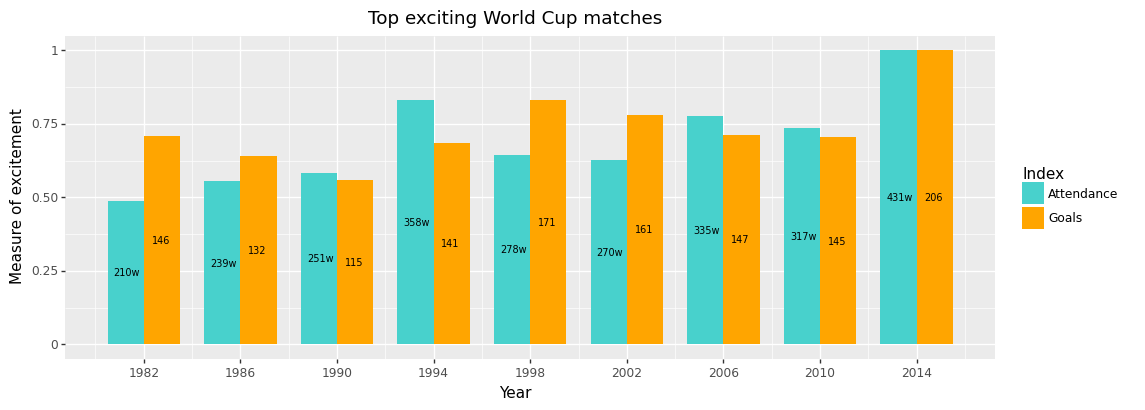

<ggplot: (156875907379)>

In [14]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_manual(["mediumturquoise", "orange"])
)
p


除此之外，还可以使用HEX代码来表示颜色，如以上区域的颜色可改为#F0FF00、#58CFFB。

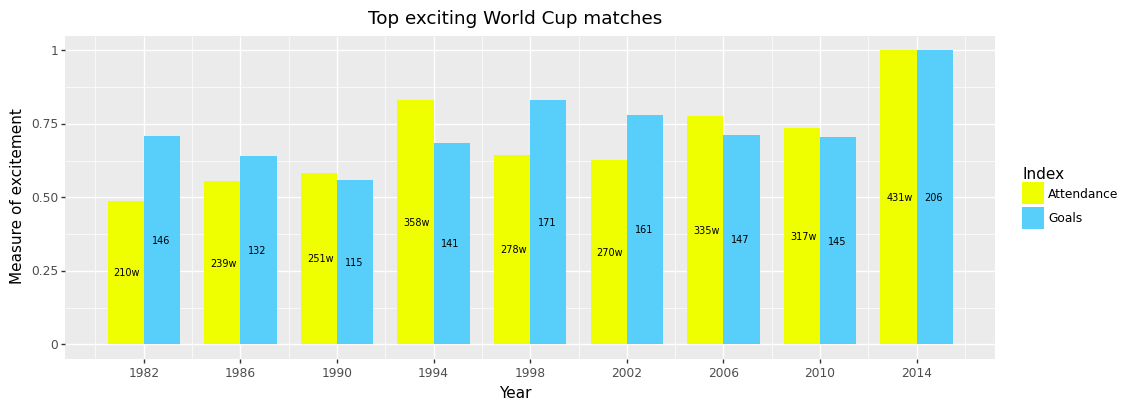

<ggplot: (156875963152)>

In [15]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_manual(["#F0FF00", "#58CFFB"])
)
p

除了手动的调颜色，还可以使用现成的配色方案，plotnine提供了scale_colour_brewer的选项，需要的参数主要是type和palette。type指数据的类型，有['seq', 'div', 'qual']三个选择，分别是连续、离散、定性，其实不一定要严格按照这个来，只要配色适合就可以。palette可以是str和int类型，如果是前者，则按该命名选取；如果是后者，因每个值都有对应的str，索引即可，默认为1。

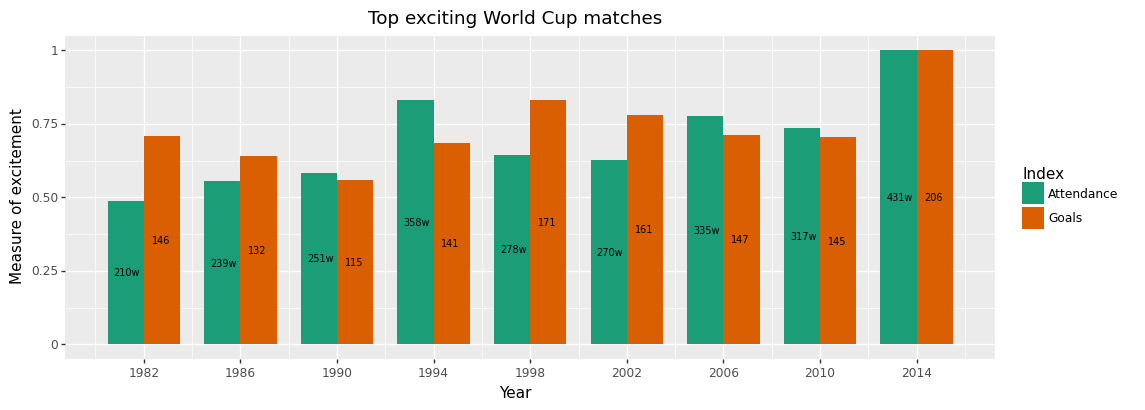

<ggplot: (156876241752)>

In [16]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_brewer(type='qual', palette=2)
)
p

## 10 调整图例
目前的图例处于默认位置，即整体的右侧，较为割裂，这可以添加一个theme选项来做调整。具体来说，可设置legend_position选项指定其位于底部，并设置legend_direction="horizontal"让图例水平排布，当然这是底部的默认选项，可不写出。同时，‘Index’作为图例的标题有点冗余，可以用legend_title=element_blank()将它隐藏。

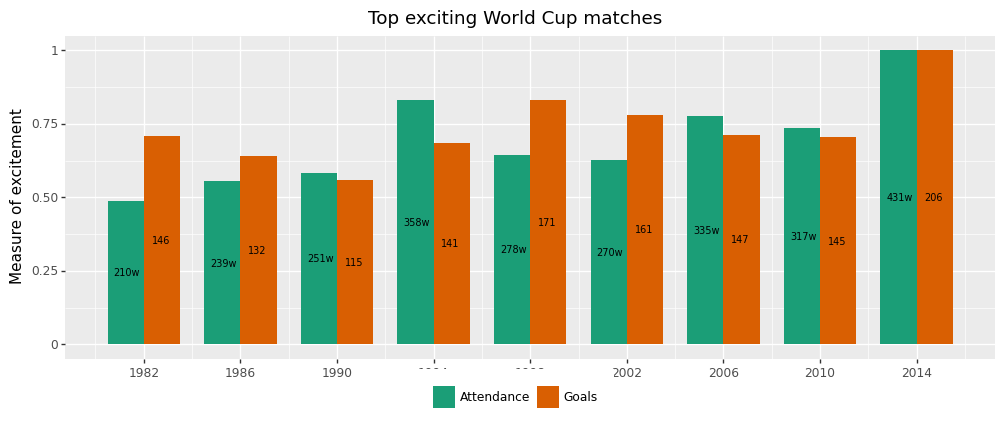

<ggplot: (156875917736)>

In [17]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_brewer(type='qual', palette=2)
    + theme(
        legend_position="bottom",
        legend_title=element_blank(),
    )
)
p

但有点问题的就是，图例把X轴的标题以及部分数据遮住了。这时需要在theme中使用 legend_box_spacing 选项来解决这个问题，它可以将图例的位置向下移动。具体的值要由具体情况而定，可以反复调整取最佳的位置。

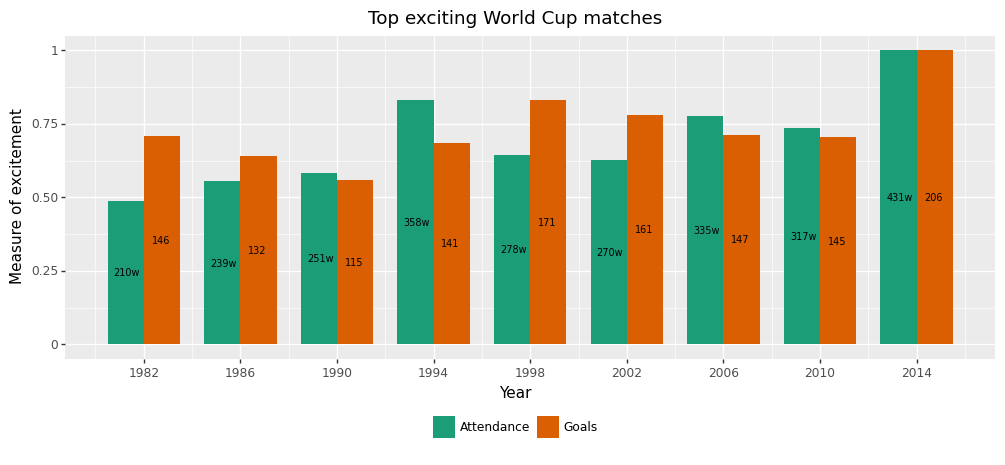

<ggplot: (156875735251)>

In [18]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_brewer(type='qual', palette=2)
    + theme(
        legend_position="bottom",
        legend_title=element_blank(),
        legend_box_spacing=0.4,
    )
)
p

可以看到，图例在下方单独拿一部分来显示会感觉有点冗余，希望其放在与‘Year’平行靠右的位置。这里可以使用legend_position的另一种参数传入形式，即坐标形式(x,y)，范围在(0,0)到(1,1)对应左下角到右上角。需反复调整，得到好的位置，此处坐标选的是(0.7,0)。然后发现还需对‘Year’，即x轴标题做下移操作，可使用theme中的axis_title_x选项，参数格式需用element_text()的格式，在里面使用margin这个参数。值得一提的是，这个参数的赋值比较怪，类似于{'t': 15}的格式，前面可选项为['t','r','b','l']，表示top、right、bottom、left；后面为移动的数值。为对称考虑，也对y轴标题做相同移动。至于标题，留到下一节处理。

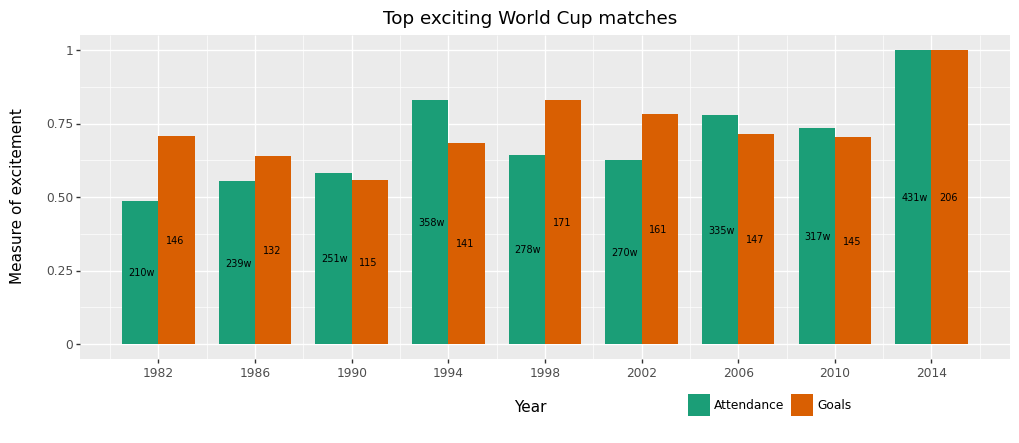

<ggplot: (156876171643)>

In [19]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_brewer(type='qual', palette=2)
    + theme(
        axis_title_x = element_text(margin={'t': 15}),
        axis_title_y = element_text(margin={'r': 15}),
        legend_position=(0.7,0),
        legend_direction="horizontal",
        legend_title=element_blank(),
    )
)
p

## 11 调整标题
类似于x轴标题的调整，theme中的plot_title选项可对标题样式做更改，同样也是在element_text()中进行参数赋值。具体用法可见下方注释。

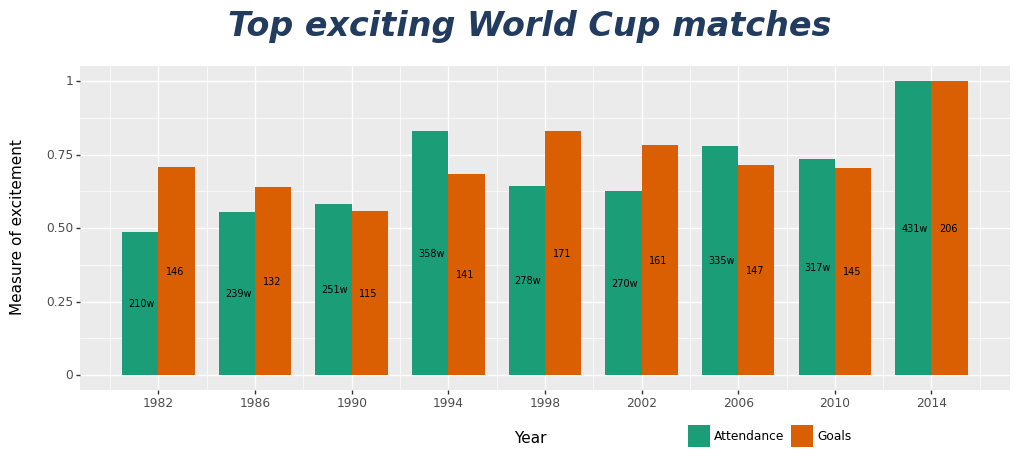

<ggplot: (156875716521)>

In [20]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_brewer(type='qual', palette=2)
    + theme(
        plot_title=element_text(face="bold.italic",  # 字体
                                color="#223C5F",  # 颜色
                                size=24,  # 大小
                                vjust=0),  # 垂直位置，相对于图，0为远离，1为靠近。
        axis_title_x=element_text(margin={'t': 15}),
        axis_title_y=element_text(margin={'r': 15}),
        legend_position=(0.7, 0),
        legend_direction="horizontal",
        legend_title=element_blank(),
    )
)
p

## 12 选用主题
以上都是对一些细节进行改动，如果相对整体的样式进行改动，可在在ggplot()后面添加对应的主题函数。主要有以下几种：
- theme_grey()：默认主题，灰色背景，不带x、y轴线，带白色网格线等
- theme_bw()：变色背景，带全方位x、y轴线（上下左右），带灰色网格线
- theme_classic()：无网格线，有轴线，类似excel风格
- theme_linedraw()：白色背景黑色线条，带黑框
- theme_light()：和theme_linedraw()很像，区别是线条为灰色
- theme_dark()：黑色背景的theme_light()，可以用来画薄彩色线条
- theme_minimal()：简约主题，无框
- theme_void()：空白主题
- theme_xkcd()：XKCD风格的主题
- theme_538()：538主题，灰色背景，无框，带线
还有一些以其他可视化工具为格式的主题，如theme_matplotlib()、theme_seaborn。

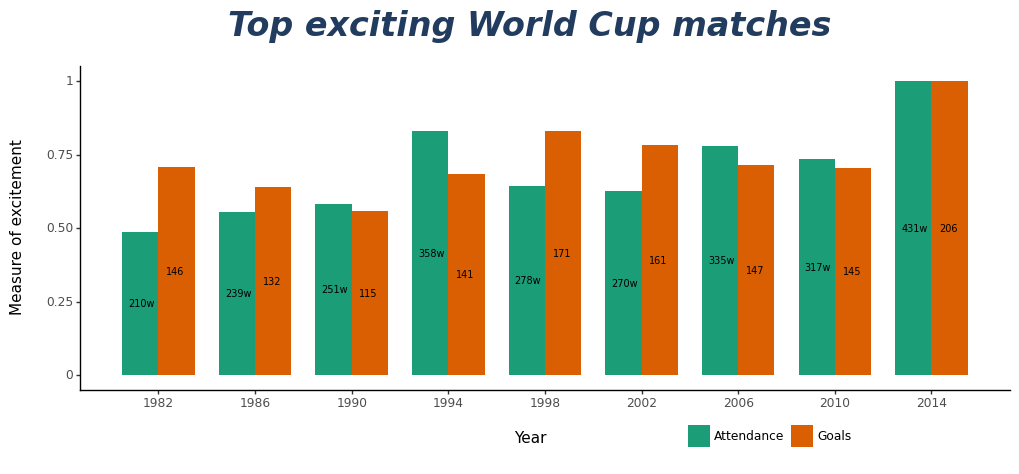

<ggplot: (156876533097)>

In [21]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"), size=7)
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_brewer(type='qual', palette=2)
    + theme_classic()
    + theme(
        plot_title=element_text(face="bold.italic",  # 字体
                                color="#223C5F",  # 颜色
                                size=24,  # 大小
                                vjust=0),  # 垂直位置，相对于图，0为远离，1为靠近。
        axis_title_x=element_text(margin={'t': 15}),
        axis_title_y=element_text(margin={'r': 15}),
        legend_position=(0.7, 0),
        legend_direction="horizontal",
        legend_title=element_blank(),
    )
)
p

## 13 创建自定义主题
首先，自定义一个主题就要选定使用的字体，由于内置的字体有限，可从外部导入下载好的字体。再通过matplotlib.font_manager中的FontProperties选项以创建对象的形式把该字体加载到Python以供使用,并可以对该对象进行格式的设置。
具体到本次作业，我力图创建一个科技感的主题，使用的字体为赛博朋克风格的“Qualy_Bold.ttf”。

In [22]:
# 导入模块
import matplotlib.font_manager as fm
# 读取字体
fpath = "Qualy_Bold.ttf"
# 创建字体对象
title_text = fm .FontProperties(fname=fpath)
body_text = fm .FontProperties(fname=fpath)
# 设置字体大小和样式，标题要设得大和粗一点
title_text .set_size(24)
title_text .set_weight("bold")
body_text.set_size(12)

为了让图表看起来更科技感，作如下改动：
- 改变各项文字的颜色，具体包括geom_text(colour='black')；plot_title、axis_title_x、axis_title_y、axis_text_x、axis_text_y中的element_text(color="#EAF7F7")
- 通过改变 axis_line_x 和 axis_line_y 的参数可以改变轴线的厚度和颜色，传值需用element_line()映射。
- 摆脱网格线，需要设置四个参数为空（element_blank()）：panel_grid_major, panel_grid_minor, panel_border 和 panel_background。
- 使用刚刚导入的科技感字体，需改变plot_title和text的值，传值也要进行映射：element_text(fontproperties=body_text)。
- 去除图例的背景色，设置legend_background为空。

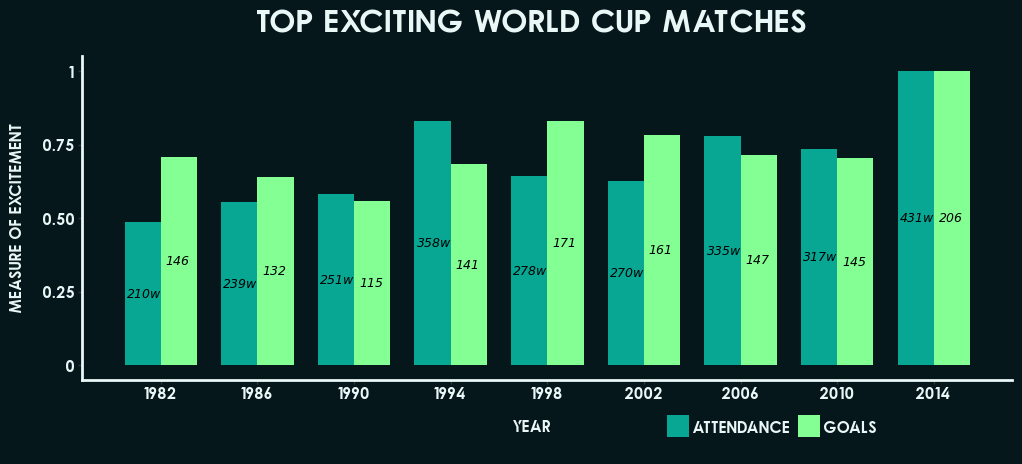

<ggplot: (156876500176)>

In [23]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"),
                size=9, colour='black', fontstyle='oblique')
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_manual(["#07a793", "#84ff94"])
    + theme(
        plot_background=element_rect(fill='#05171b', colour='#05171b'),
        plot_title=element_text(color="#EAF7F7",  # 颜色
                                size=24,  # 大小
                                vjust=0,
                                fontproperties=title_text
                                ),  # 垂直位置，相对于图，0为远离，1为靠近。
        axis_title_x=element_text(margin={'t': 15}, colour="#EAF7F7"),
        axis_title_y=element_text(margin={'r': 15}, colour="#EAF7F7"),
        legend_position=(0.7, 0),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_text=element_text(colour="#EAF7F7"),
        axis_line_x=element_line(size=2, colour="#EAF7F7"),
        axis_line_y=element_line(size=2, colour="#EAF7F7"),
        legend_background=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        text=element_text(fontproperties=body_text),
        axis_text_x=element_text(colour="#EAF7F7"),
        axis_text_y=element_text(colour="#EAF7F7"),
    )
)
p

## 14 添加图片
最后，为在标题中展现足球的元素，可以通过watermark（水印）来导入本地图片。具体设置为filename为图片路径, xo、yo为图片的位置，可随具体情况调整。

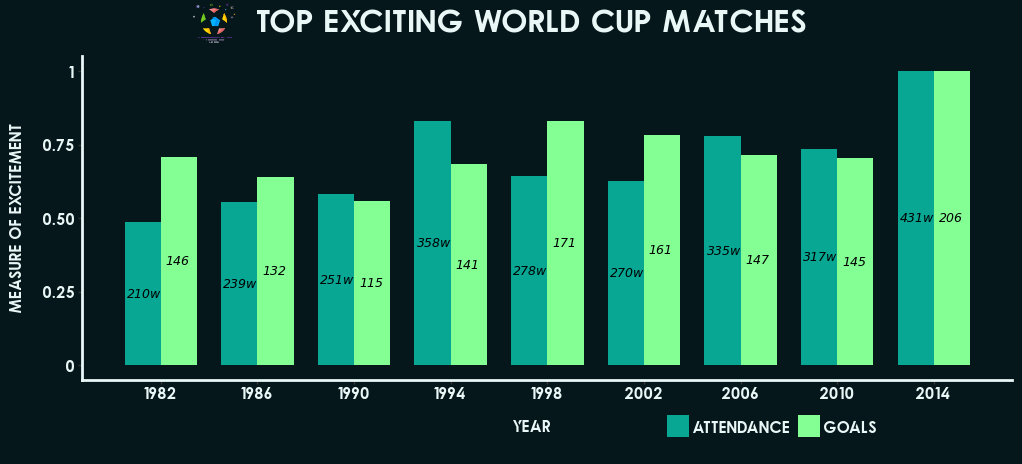

<ggplot: (156875740413)>

In [24]:
p = (
    ggplot(df, aes(x='Year', y='Grade', fill='Index'))
    + geom_col(position="dodge", width=3)
    + geom_text(df, aes(x="x_pos", y="y_pos", label="y_show"),
                size=9, colour='black', fontstyle='oblique')
    + scale_x_continuous(breaks=np .arange(1982, 2015, 4))
    + ggtitle("Top exciting World Cup matches")
    + xlab("Year")
    + ylab("Measure of excitement")
    + scale_fill_manual(["#07a793", "#84ff94"])
    + theme(
        plot_background=element_rect(fill='#05171b', colour='#05171b'),
        plot_title=element_text(color="#EAF7F7",  # 颜色
                                size=24,  # 大小
                                vjust=0,
                                fontproperties=title_text
                                ),  # 垂直位置，相对于图，0为远离，1为靠近。
        axis_title_x=element_text(margin={'t': 15}, colour="#EAF7F7"),
        axis_title_y=element_text(margin={'r': 15}, colour="#EAF7F7"),
        legend_position=(0.7, 0),
        legend_direction="horizontal",
        legend_title=element_blank(),
        legend_text=element_text(colour="#EAF7F7"),
        axis_line_x=element_line(size=2, colour="#EAF7F7"),
        axis_line_y=element_line(size=2, colour="#EAF7F7"),
        legend_background=element_blank(),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_blank(),
        panel_background=element_blank(),
        text=element_text(fontproperties=body_text),
        axis_text_x=element_text(colour="#EAF7F7"),
        axis_text_y=element_text(colour="#EAF7F7"),
    )
    + watermark(filename='soccer.png', xo=190, yo=417)
)
p

## 总结
本文根据课上所学内容，对时下热点内容进行了可视化。先对数据按ggplot的要求读入格式进行了预处理，再依次进行了基本视图绘制，并在此基础上做了一系列的优化，包括数据标签、轴的刻度与标签、标题、配色、图例、主题和图片的添加与调整。最后，得到了一张美观、简洁且具有科技感的世界杯精彩程度双直方图。